# FFT

Create animated visualizers related to fast Fourier transforms.

In [1]:
from neurodsp.sim import sim_combined, sim_oscillation
from neurodsp.utils import create_times, set_random_seed

In [2]:
# Import local code
from vcode.measures.fft import decompose_fft
from vcode.build.fft import (build_sines, build_recomb, build_powers, build_phases,
                             build_params, build_sigs, build_fft)

## Settings

In [3]:
import seaborn as sns
sns.set_context('talk')

In [4]:
# Set random seed
set_random_seed(505)

In [5]:
# Simulation settings
fs = 1000
n_seconds = 100

In [6]:
# Notebook settings
SAVE = False

## Simulate Data

In [7]:
# Define simulated data parameters
comps = {'sim_powerlaw' : {'exponent' : -1.75, 'f_range' : (1.4, 75)}, 
         'sim_bursty_oscillation' : {'freq' : 10, 'leave_burst' : 0.4}}
comp_vars = [1, 1]

times = create_times(n_seconds, fs)

sig = sim_combined(n_seconds, fs, comps, comp_vars)

### Test

In [8]:
data = sig[:1000]

In [9]:
sines, freqs, phases, powers = decompose_fft(data)

### Plot individual builds

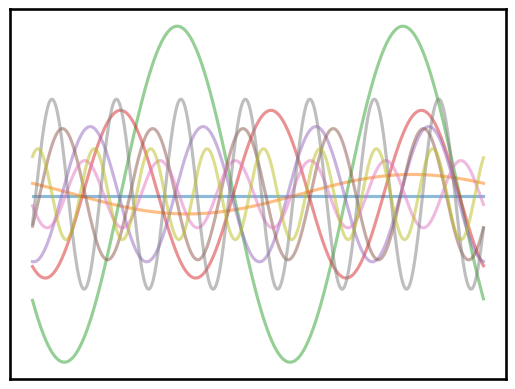

In [10]:
build_sines(sines, n_build=10)

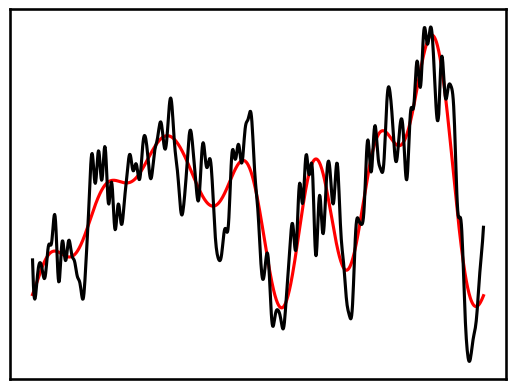

In [11]:
build_recomb(sines, data, n_build=10)

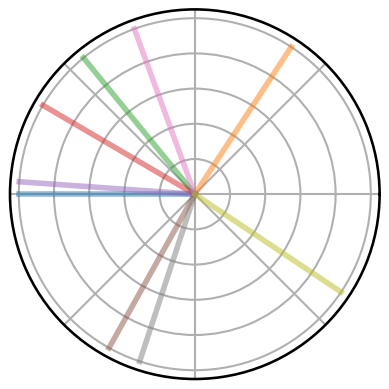

In [12]:
build_phases(phases, n_build=10)

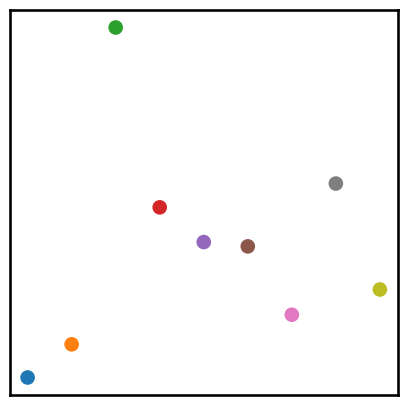

In [13]:
build_powers(freqs, powers, n_build=10)

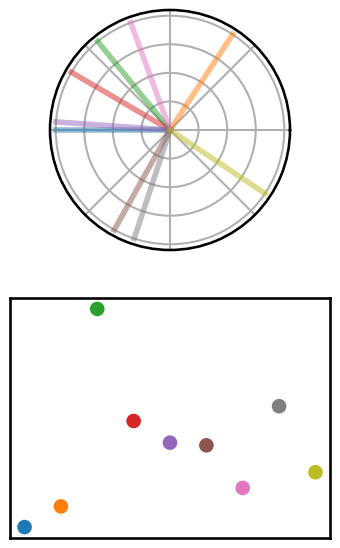

In [14]:
build_params(freqs, phases, powers, n_build=10)

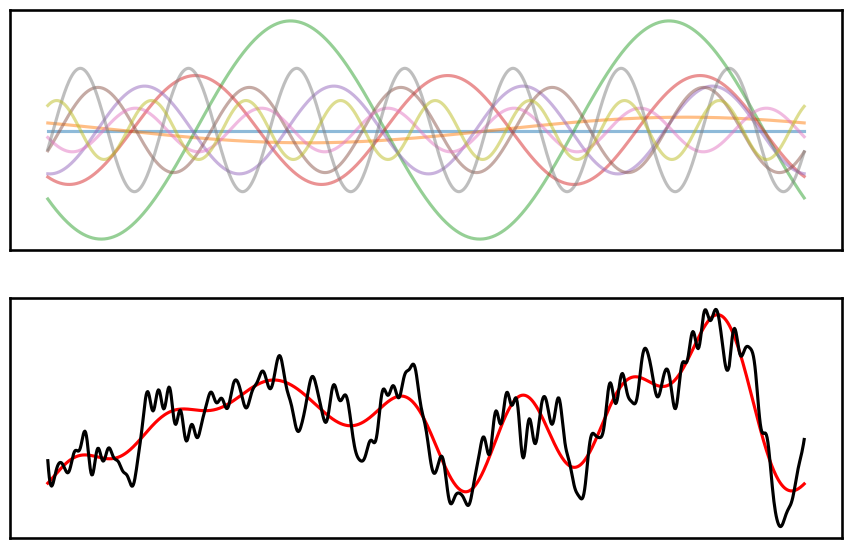

In [15]:
build_sigs(sines, data, n_build=10)

## Apply it!

In [16]:
data = sig[0:1000]
sines, freqs, phases, powers = decompose_fft(data)

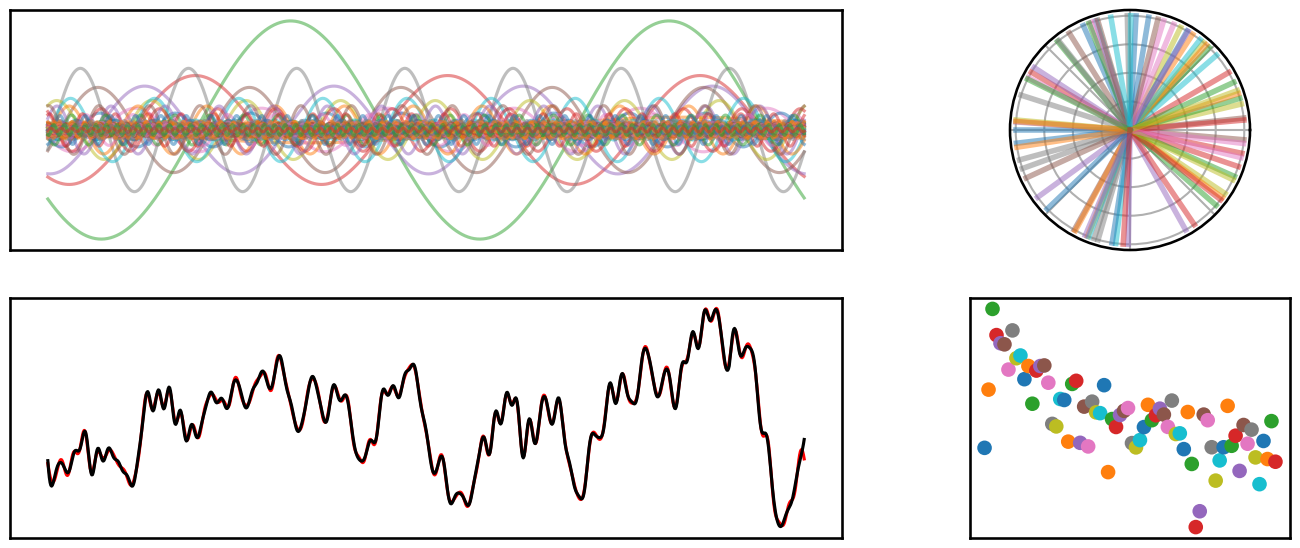

In [17]:
build_fft(sines, data, freqs, phases, powers, n_build=75, save=SAVE, label='02-fft_ap')

In [18]:
data = sig[1000:2000]
sines, freqs, phases, powers = decompose_fft(data)

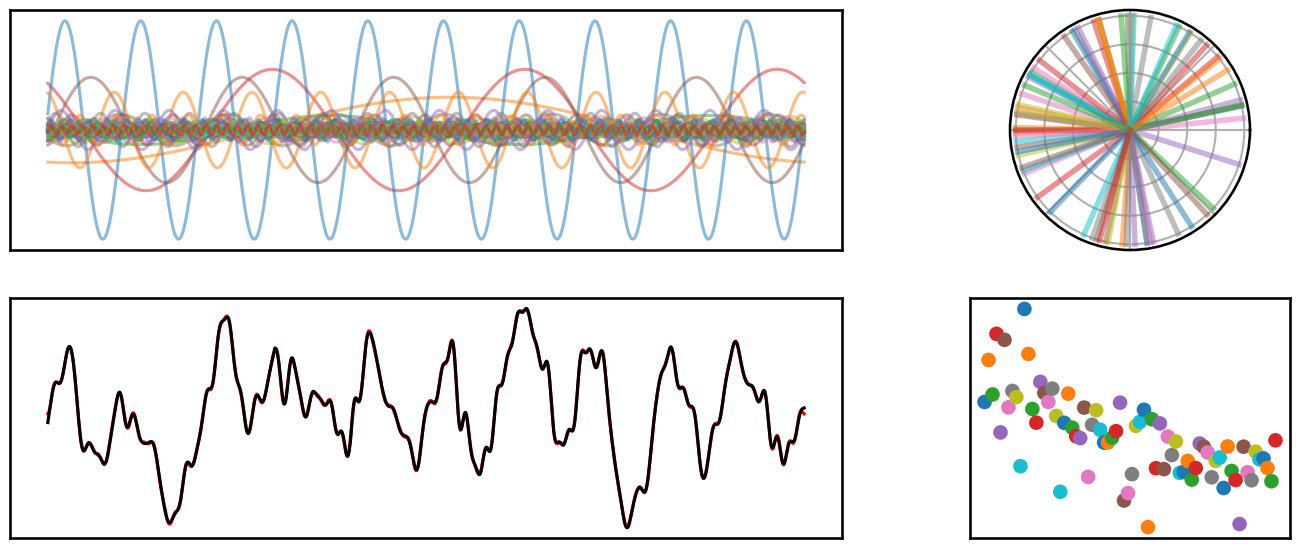

In [19]:
build_fft(sines, data, freqs, phases, powers, n_build=75, save=SAVE, label='02-fft_pe')

## Explore on simulated waves

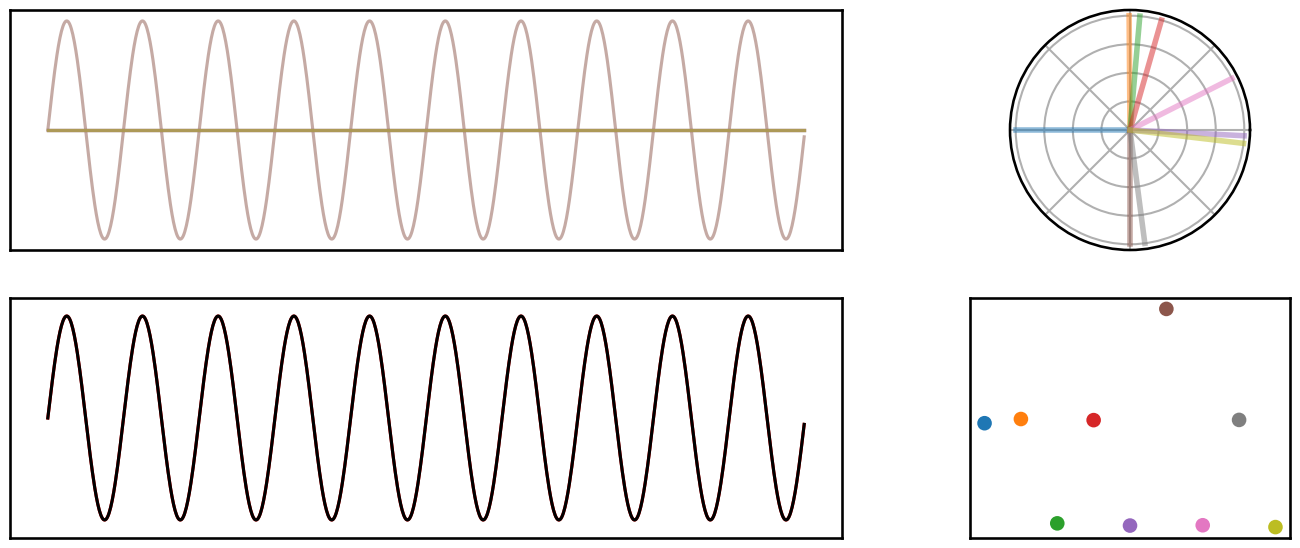

In [20]:
osc1 = sim_oscillation(1, 1000, 10, cycle='sine')
data = osc1[:1000]
sines, freqs, phases, powers = decompose_fft(data, threshold=0.0)
build_fft(sines, data, freqs, phases, powers, n_build=10)

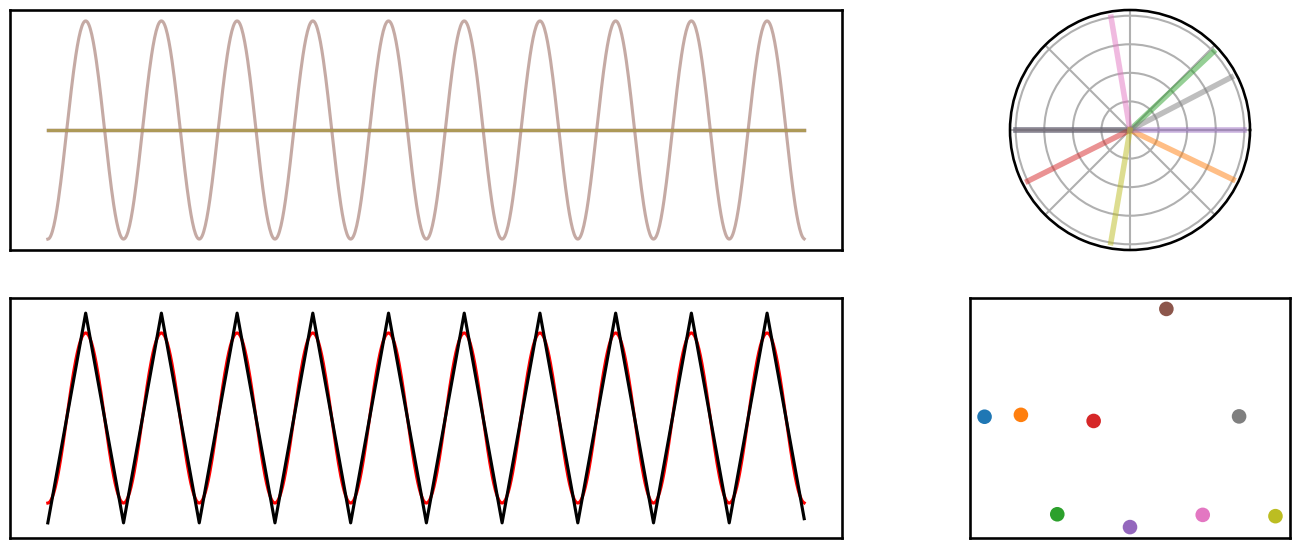

In [21]:
osc2 = sim_oscillation(1, 1000, 10, cycle='sawtooth', width=0.5)
data = osc2[:1000]
sines, freqs, phases, powers = decompose_fft(data, threshold=0.0)
build_fft(sines, data, freqs, phases, powers, n_build=10)